In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [101]:
class StructVisualizer:
    def __init__(self, fields, packed=False):
        self.fields = fields
        self.packed = packed
        self.layout = self.calculate_memory_layout()

    def calculate_memory_layout(self):
        memory = []
        bit_position = 0
        word_size = 32
        
        for name, bit_size, dtype in self.fields:
            if not self.packed:
                if ((bit_position % word_size) + bit_size) > word_size:
                    bit_position = ((bit_position // word_size) + 1) * word_size
            
            memory.append((bit_position, bit_size, name, dtype))
            bit_position += bit_size

        struct_size = (bit_position + word_size - 1) // word_size * word_size
        return memory, struct_size, word_size

    def visualize(self):
        memory, struct_size, word_size = self.layout
        fig, ax = plt.subplots(figsize=(28, 12))

        for bit_pos, bit_size, name, dtype in memory:
            start_byte = bit_pos // 8
            start_bit = bit_pos % 8
            end_bit = (bit_pos + bit_size) % 8
            color = 'ivory' if dtype == 'unsigned' else 'lightblue'
            
            ax.broken_barh([(bit_pos, bit_size)], (0, 1), facecolors=color, edgecolor="black")
            ax.text(bit_pos + bit_size / 2, 0.5, name, ha="center", va="center", fontsize=10)
            ax.text(bit_pos + bit_size / 2, 0.4, bit_size, ha="center", va="center", fontsize=10)

        ax.set_xlim(0, struct_size)
        ax.set_ylim(0, 1)
        ax.set_xticks(np.arange(0, struct_size, 8))
        ax.set_xticklabels([f"Byte{i}" for i in range(struct_size // 8)])
        ax.set_yticks([])
        ax.set_title(f"Memory Layout:")
        ax.grid(axis="x", linestyle="-", linewidth=0.5, color="gray")

        for x in np.arange(0, struct_size, word_size):
            ax.vlines(x, ymin=0, ymax=1, colors='red', linestyles='-', linewidth=3)

        plt.show()

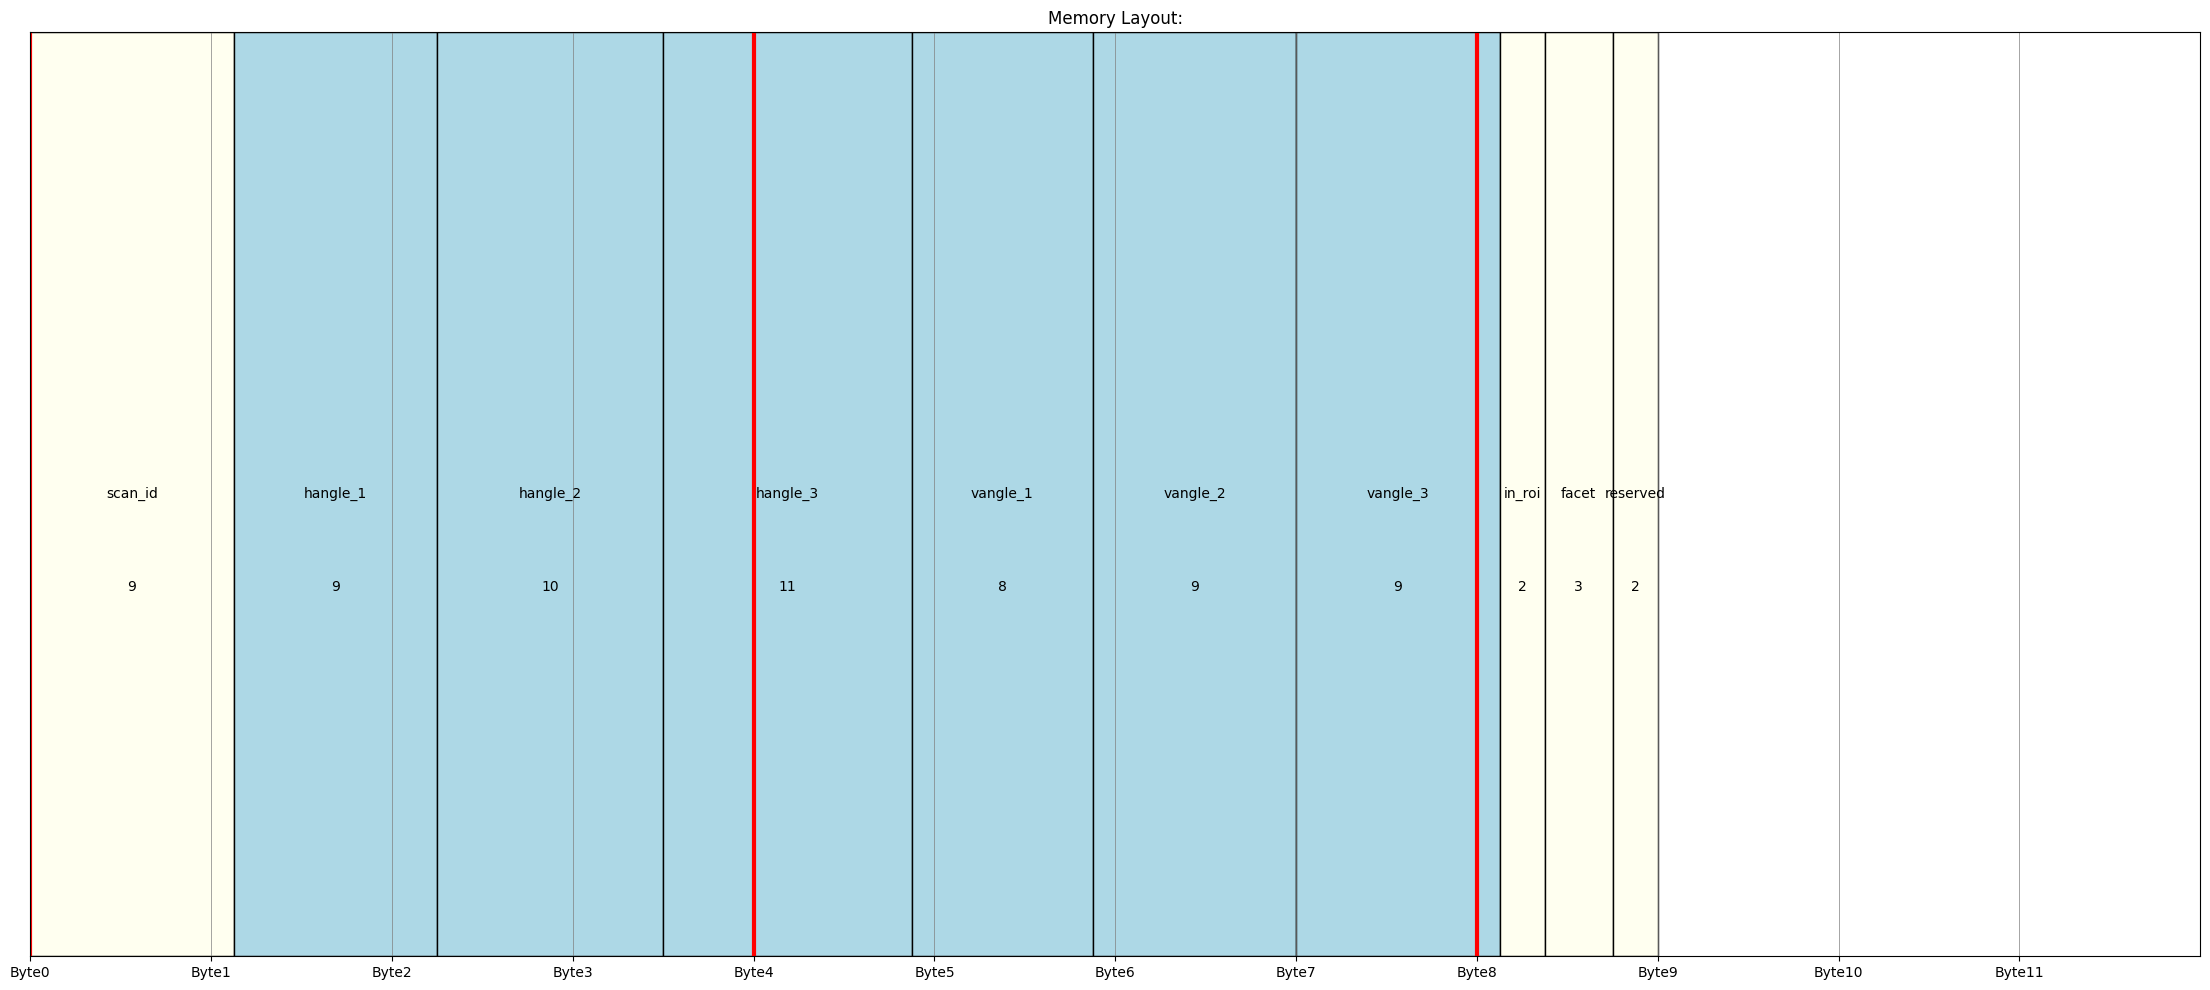

In [103]:
fields = [
    ("scan_id", 9, "unsigned"),
    ("hangle_1", 9, "signed"),
    ("hangle_2", 10, "signed"),
    ("hangle_3", 11, "signed"),
    ("vangle_1", 8, "signed"),
    ("vangle_2", 9, "signed"),
    ("vangle_3", 9, "signed"),
    ("in_roi", 2, "unsigned"),
    ("facet", 3, "unsigned"),
    ("reserved", 2, "unsigned")
]

vis = StructVisualizer(fields, packed=True)
vis.visualize()

In [46]:
import ctypes

class Test(ctypes.Structure):
    _fields_ = [
        ("scan_id", ctypes.c_uint32, 9),
        ("hangle1", ctypes.c_int32, 9),
        ("hangle2", ctypes.c_int32, 10),
        ("hangle3", ctypes.c_int32, 11),
        ("vangle1", ctypes.c_int32, 8),
        ("vangle2", ctypes.c_int32, 9),
        ("vangle3", ctypes.c_int32, 9),
        ("roi", ctypes.c_uint32, 2),
        ("f", ctypes.c_uint32, 3),
        ("reserved", ctypes.c_uint32, 2),
    ]

# Check the offsets
for field in Test._fields_:
    print(f"Offset of {field[0]}: {getattr(Test, field[0]).offset} bytes")


Offset of scan_id: 0 bytes
Offset of hangle1: 0 bytes
Offset of hangle2: 0 bytes
Offset of hangle3: 4 bytes
Offset of vangle1: 4 bytes
Offset of vangle2: 4 bytes
Offset of vangle3: 8 bytes
Offset of roi: 8 bytes
Offset of f: 8 bytes
Offset of reserved: 8 bytes


In [100]:
20%32


20